# Loading the dataset

In [111]:
import pandas as pd
import numpy as np

In [112]:
!if [ ! -f hepatitis.data ]; then wget https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data; fi

In [113]:
headers = ["Class","AGE", "SEX", "STEROID","ANTIVIRALS", "FATIGUE","MALAISE", "ANOREXIA", "LIVER_BIG",
           "LIVER_FIRM","SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK_PHOSPHATE","SGOT",
           "ALBUMIN","PROTIME","HISTOLOGY"]
df = pd.read_csv("hepatitis.data", names=headers)
df.replace('?',np.nan, inplace=True)
df = df.apply(pd.to_numeric)

# Preprocessing

## Exploring the data
test

In [114]:
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   STEROID          154 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          154 non-null    float64
 6   MALAISE          154 non-null    float64
 7   ANOREXIA         154 non-null    float64
 8   LIVER_BIG        145 non-null    float64
 9   LIVER_FIRM       144 non-null    float64
 10  SPLEEN_PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK_PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

In [116]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

## Too many NAs to drop
  PROTIME has 67 null values which accounts for about 43% of the records, dropping those values would yield poor results when training any model on the data.

## The filling strategy
  Fill Catagorical columns with the most frequent value, and the continous columns with their mean.

In [117]:
#Filling the continues_variables
continous_headers = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT']

df[continous_headers] = df[continous_headers].fillna(df[continous_headers].mean())


#Filling the catagorical_variables
categorical_headers = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA',
                       'LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES',
                       'VARICES', 'HISTOLOGY']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

imputer.fit(df)
transformed_data = imputer.transform(df)

imputed_df = pd.DataFrame(transformed_data, columns=headers)
imputed_df.head(10)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2.0,30.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.000000,85.000000,18.00000,4.000000,61.852273,1.0
1,2.0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.900000,135.000000,42.00000,3.500000,61.852273,1.0
2,2.0,78.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.700000,96.000000,32.00000,4.000000,61.852273,1.0
3,2.0,31.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.700000,46.000000,52.00000,4.000000,80.000000,1.0
4,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,105.325397,200.00000,4.000000,61.852273,1.0
5,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.900000,95.000000,28.00000,4.000000,75.000000,1.0
6,1.0,51.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.427517,105.325397,85.89404,3.817266,61.852273,1.0
7,2.0,23.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,105.325397,85.89404,3.817266,61.852273,1.0
8,2.0,39.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.700000,105.325397,48.00000,4.400000,61.852273,1.0
9,2.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,105.325397,120.00000,3.900000,61.852273,1.0


In [118]:
#Check if there are any NAs left
imputed_df.isna().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

## Correlation of the fetures
Check if any of the features are correlated, if so we can drop correlated features to help the models better learn from the actual data instead of the model

## Strategy
use pandas' corr function to explore the correlation matrix of the dataset.

In [119]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,1.000000,-0.219647,0.173051,0.134700,-0.130196,0.309269,0.337859,0.132172,-0.077630,0.063155,0.238734,0.398308,0.477882,0.368846,-0.450470,-0.141005,-0.075579,0.465827,0.307238,-0.337856
AGE,-0.219647,1.000000,0.008126,-0.085732,-0.013100,-0.282223,-0.115236,0.090394,-0.105480,-0.109382,-0.074853,-0.179997,-0.066220,-0.048893,0.122884,0.008076,0.081052,-0.246169,-0.153312,0.170780
SEX,0.173051,0.008126,1.000000,-0.046989,-0.089249,-0.071822,-0.028820,0.017030,-0.072336,-0.059761,-0.055556,-0.042220,0.130744,0.054707,-0.056218,0.073253,-0.017625,0.005459,-0.009125,-0.137450
STEROID,0.134700,-0.085732,-0.046989,1.000000,0.060101,0.164326,0.242942,0.074380,0.214488,0.086463,0.077071,0.028675,-0.031453,-0.074925,-0.049106,-0.036362,-0.041857,0.215540,0.077212,-0.090109
ANTIVIRALS,-0.130196,-0.013100,-0.089249,0.060101,1.000000,-0.059445,-0.018540,-0.043552,0.042350,0.075593,-0.172756,-0.159695,-0.171184,-0.161165,0.181179,0.197594,0.107876,-0.165443,-0.027317,0.209242
FATIGUE,0.309269,-0.282223,-0.071822,0.164326,-0.059445,1.000000,0.595142,0.376350,0.112892,0.272435,0.195256,0.383333,0.289931,0.187125,-0.274053,-0.148967,-0.200156,0.312300,0.208383,-0.151556
MALAISE,0.337859,-0.115236,-0.028820,0.242942,-0.018540,0.595142,1.000000,0.599647,0.057090,0.118382,0.013690,0.325979,0.332910,0.170193,-0.295513,-0.195332,-0.203230,0.291312,0.201184,-0.140592
ANOREXIA,0.132172,0.090394,0.017030,0.074380,-0.043552,0.376350,0.599647,1.000000,0.091287,0.067320,0.041667,0.309614,0.196116,0.174380,-0.298286,-0.153764,-0.235023,0.155718,0.045273,-0.078895
LIVER_BIG,-0.077630,-0.105480,-0.072336,0.214488,0.042350,0.112892,0.057090,0.091287,1.000000,0.467950,0.099083,0.220389,-0.110876,-0.062366,-0.002490,-0.124077,0.043151,-0.055210,-0.064705,-0.072269
LIVER_FIRM,0.063155,-0.109382,-0.059761,0.086463,0.075593,0.272435,0.118382,0.067320,0.467950,1.000000,0.187541,0.355901,0.037966,0.189999,-0.059741,-0.329049,-0.137180,0.190872,0.042607,-0.191663


We can see that some features are more correlated than others but i don't think they are correleated enough to be eligible for dropping

## Different Scales
 The second problem we can find with our data is that different columns have different scales, and that could effect the accuracy of some of the calssification techniques such as the KNN classifier.

## Strategy
Use sklearn's StandardScaler to scale the dataset

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(imputed_df.drop('Class', axis=1))
y = imputed_df['Class']
x

array([[-8.94191753e-01,  2.94745653e+00, -1.01954582e+00, ...,
         2.97245587e-01, -4.14601335e-16, -9.07485213e-01],
       [ 7.02579235e-01, -3.39275572e-01, -1.01954582e+00, ...,
        -5.16083873e-01, -4.14601335e-16, -9.07485213e-01],
       [ 2.93805862e+00, -3.39275572e-01,  9.80828893e-01, ...,
         2.97245587e-01, -4.14601335e-16, -9.07485213e-01],
       ...,
       [ 1.58080328e+00, -3.39275572e-01, -1.01954582e+00, ...,
         4.59911479e-01, -4.14601335e-16,  1.10194633e+00],
       [ 9.42094883e-01,  2.94745653e+00, -1.01954582e+00, ...,
         4.59911479e-01, -8.08279429e-01,  1.10194633e+00],
       [ 1.43709389e-01, -3.39275572e-01,  9.80828893e-01, ...,
        -1.16674744e+00, -1.15837913e+00,  1.10194633e+00]])

## Class imabalance
The third problem we find with our data is that the classes are imablanced, we have 32 patients who didn't survive(DIE) and 123 who did(LIVE). 
This large imabalnce between the classes could also effect the accuracy of the models

## Strategy
Using over-sampling techniques to decrease the imbalance. For example we could use Random over-sampling or SMOTE from the imblearn

Text(0.5, 1.0, 'Class distribuition before oversampling')

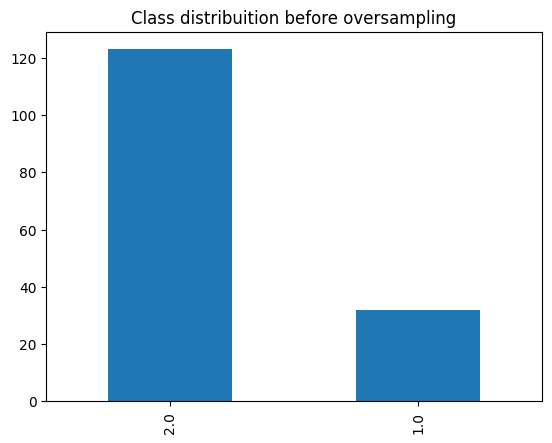

In [121]:
from sklearn.model_selection import train_test_split
class_nobalance = pd.Series(y).value_counts().plot.bar()
class_nobalance.set_title("Class distribuition before oversampling")

Text(0.5, 1.0, 'Class distribuition after oversampling')

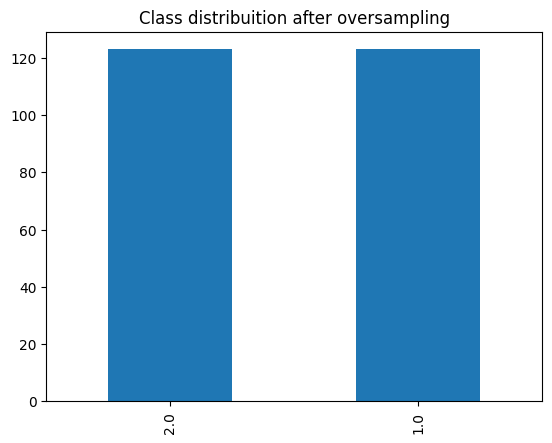

In [122]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=43)
x_balanced, y_balanced = sm.fit_resample(x, y)
class_nobalance = pd.Series(y_balanced).value_counts().plot.bar()
class_nobalance.set_title("Class distribuition after oversampling")

# Training the models
Since our dataset is realtively small with only 155 records, I beleive it would be better to use **cross validation** to test the models and get reliable scores instead of just splitting the dataset randomly

# Strategy
Use sklearn's cross_val_score for each classifier to determine the average of its score with cv=10

In [123]:
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model_scores = {}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

def get_confusion_matrix_dsiplay(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  return ConfusionMatrixDisplay(cm)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_validate(knn, x_balanced, y_balanced, cv=10)
model_scores['KNN'] = scores
print("Scores of cross_validation:", scores)

# get_confusion_matrix_dsiplay(knn).plot()

Scores of cross_validation: {'fit_time': array([0.00151277, 0.0010922 , 0.00334001, 0.00117087, 0.00107503,
       0.00103188, 0.00110602, 0.00088668, 0.0008769 , 0.0008533 ]), 'score_time': array([0.00309086, 0.00348306, 0.00288844, 0.00605679, 0.00564933,
       0.00303602, 0.00256062, 0.00241375, 0.00245309, 0.0023663 ]), 'test_score': array([0.96      , 0.96      , 0.92      , 0.96      , 0.88      ,
       0.88      , 0.79166667, 0.83333333, 0.79166667, 0.75      ])}


In [125]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores=cross_validate(gnb, x_balanced, y_balanced, cv=10)
model_scores['Gaussian NB'] = scores
print("Scores of cross_validation:", scores)

# get_confusion_matrix_dsiplay(gnb).plot()

Scores of cross_validation: {'fit_time': array([0.00203323, 0.00187016, 0.00454164, 0.00136352, 0.00116229,
       0.00112724, 0.00115705, 0.00111079, 0.00108027, 0.00124311]), 'score_time': array([0.00113082, 0.00138855, 0.00114512, 0.00103045, 0.00092316,
       0.00088668, 0.00088215, 0.00087571, 0.00088787, 0.00083685]), 'test_score': array([0.88      , 0.72      , 0.84      , 0.92      , 0.8       ,
       0.8       , 0.83333333, 0.75      , 0.70833333, 0.66666667])}


In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
scores=cross_validate(lda, x_balanced, y_balanced, cv=10)

model_scores['LDA'] = scores

print("Scores of cross_validation:", scores)\

# get_confusion_matrix_dsiplay(lda).plot()

Scores of cross_validation: {'fit_time': array([0.0038321 , 0.00262141, 0.00215888, 0.00221133, 0.00207567,
       0.00275636, 0.00219607, 0.00352716, 0.00413156, 0.00357842]), 'score_time': array([0.0013926 , 0.00090718, 0.00086427, 0.00085592, 0.00085568,
       0.00101662, 0.00089455, 0.00149608, 0.00122499, 0.00300646]), 'test_score': array([0.8       , 0.84      , 0.88      , 1.        , 0.8       ,
       0.92      , 0.79166667, 0.95833333, 0.75      , 0.66666667])}


In [127]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
scores = cross_validate(dtc, x_balanced, y_balanced, cv=10)

model_scores['DTree'] = scores

print("Scores of cross_validation:", scores)

# get_confusion_matrix_dsiplay(dtc).plot()

Scores of cross_validation: {'fit_time': array([0.00313783, 0.00233364, 0.00191998, 0.00212717, 0.00166821,
       0.00171471, 0.00228572, 0.00195718, 0.00178766, 0.00183201]), 'score_time': array([0.00135255, 0.00089717, 0.00081825, 0.0007925 , 0.00079012,
       0.00089741, 0.00105906, 0.0008347 , 0.00078106, 0.00076151]), 'test_score': array([0.88      , 0.76      , 0.8       , 0.96      , 0.84      ,
       1.        , 0.70833333, 0.875     , 0.83333333, 0.91666667])}


In [128]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
scores=cross_validate(svc, x_balanced, y_balanced, cv=10)

model_scores['SVC'] = scores

print("Scores of cross_validation:", scores)
# get_confusion_matrix_dsiplay(svc).plot()

Scores of cross_validation: {'fit_time': array([0.00715351, 0.00341964, 0.00353599, 0.0053792 , 0.00290322,
       0.00425386, 0.00313044, 0.00683451, 0.00346541, 0.00325513]), 'score_time': array([0.00206518, 0.00090551, 0.0018456 , 0.00099301, 0.00086546,
       0.000875  , 0.00093579, 0.00122166, 0.0009644 , 0.00086808]), 'test_score': array([0.92      , 0.84      , 0.92      , 1.        , 0.92      ,
       0.92      , 0.83333333, 0.91666667, 0.75      , 0.79166667])}


In [129]:
svc_rbf = SVC(kernel='rbf')
scores=cross_validate(svc_rbf, x_balanced, y_balanced, cv=10)
model_scores['SVC_rbf'] = scores
print("Scores of cross_validation SVC_rbf:", scores)
# get_confusion_matrix_dsiplay(svc_rbf).plot()

Scores of cross_validation SVC_rbf: {'fit_time': array([0.00500035, 0.00283504, 0.00284362, 0.00270295, 0.0028913 ,
       0.00261092, 0.00291729, 0.00291348, 0.0024941 , 0.00286055]), 'score_time': array([0.00113773, 0.00254798, 0.00105309, 0.00103951, 0.00099707,
       0.00097322, 0.00173593, 0.00096655, 0.00093675, 0.0010612 ]), 'test_score': array([0.92      , 0.92      , 0.92      , 1.        , 0.92      ,
       0.92      , 0.91666667, 0.95833333, 0.79166667, 0.875     ])}


In [130]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_validate(lr, x_balanced, y_balanced, cv=10)

model_scores['logistic reg'] = scores
# get_confusion_matrix_dsiplay(lr).plot()

# Accuracy and performance of each model
we can view the mean of the cross_validation score for each of the models used in the next plot

In [131]:
x_data = model_scores.keys()

## Accuracy (corss_validation test_score)
The accuracy of the classifier on the test data using corss validation with cv=10


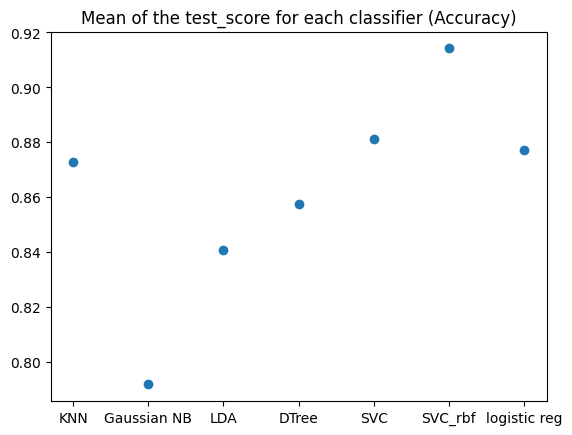

In [139]:
import matplotlib.pyplot as plt

y_data = list(map(lambda x: x['test_score'].mean(), model_scores.values()))
plt.title('Mean of the test_score for each classifier (Accuracy)')
plt.scatter(x_data, y_data)

## cross_validate fit_time
The time taken to fit the classifier to the data.

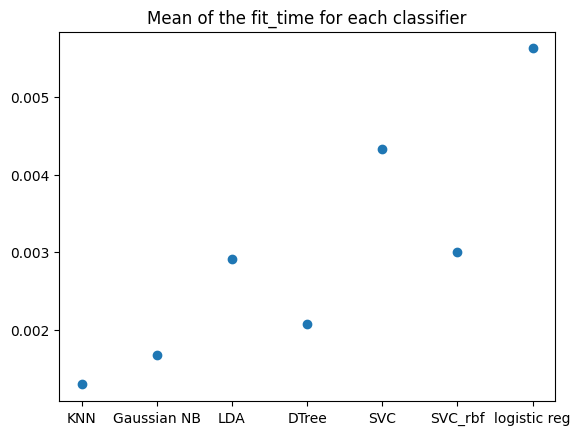

In [133]:
y_data = list(map(lambda x: x['fit_time'].mean(), model_scores.values()))
plt.title('Mean of the fit_time for each classifier')
plt.scatter(x_data, y_data)

## cross_validate score_time
The time taken to get predections from the classifier for the test data.

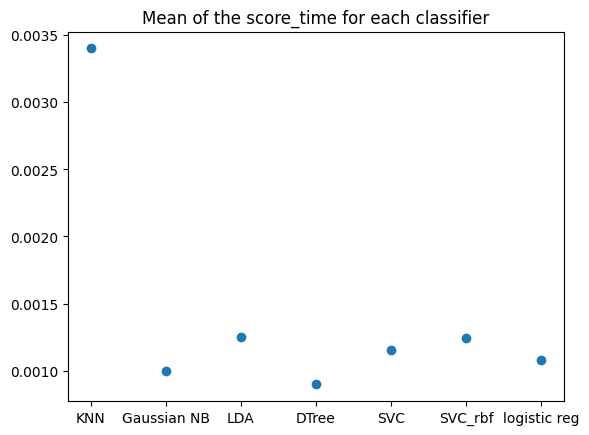

In [134]:
y_data = list(map(lambda x: x['score_time'].mean(), model_scores.values()))
plt.title('Mean of the score_time for each classifier')
plt.scatter(x_data, y_data)